In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [6]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

from langchain_community.tools import TavilySearchResults
tavily=TavilySearchResults(max_results=2)
tavily.invoke("What is the latest victory for team india as of 25th  OCT 2025?")



arxiv


/var/folders/fc/g6wd0wrn5t5b6ryr1q6s38p40000gn/T/ipykernel_30634/2553622734.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults(max_results=2)


[{'title': 'India Nears Historic Win in Thrilling Asia Cup 2025 Match',
  'url': 'https://www.instagram.com/asiacup2025/p/DQOSVejk6FZ/',
  'content': 'asiacup2025. RIVALRY OVER… INDIA ON TOP! Team India crush Pakistan in the Asia Cup 2025 Final Big stage ✔️ Big win ✔️ Blue domination ✔️',
  'score': 0.4813325},
 {'title': 'Asia Cup 2025: India and Pakistan turn cricket into ...',
  'url': 'https://www.aljazeera.com/opinions/2025/10/1/asia-cup-2025-india-and-pakistan-turn-cricket-into-militarised-theatre',
  'content': "TOPSHOT - India's captain Suryakumar Yadav (R) playfully pretends to hold the trophy as his team celebrates their victory at the end of the Asia Cup 2025 Twenty20 international cricket final match between India and Pakistan at the Dubai International Stadium in Dubai on September 28, 2025. [...] Despite being fined for making comments deemed political – dedicating India’s win to the victims of the Pahalgam attack and the Indian armed forces – at a post-match news confere

In [7]:
api_wrapper_wikipedia=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia)
wiki.name

'wikipedia'

In [3]:
arxiv.invoke("What is the latest research on LangChain?")

'Published: 2025-04-03\nTitle: A Review of Prototyping in XR: Linking Extended Reality to Digital Fabrication\nAuthors: Bixun Chen, Shaun Macdonald, Moataz Attallah, Paul Chapman, Rami Ghannam\nSummary: Extended Reality (XR) has expanded the horizons of entertainment and social\nlife and shows great potential in the manufacturing industry. Prototyping in XR\ncan help designers make initial proposals and iterations at low cost before\nmanufacturers and investors decide whether to invest in research, dev'

In [4]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="ReAct-agent"



In [ ]:
def multiply(a:int,b:int)->int:
    """Multiplies a and b.

    Args:
      a:first int
      b:second int
    """
    return a*b
def add(a:int,b:int)->int:
    """Adds a and b.

    Args:
      a:first int
      b:second int
    """
    return a+b

def divide(a:int,b:int)->float:
    """Divides a by b.

    Args:
      a:first int
      b:second int
    """
    return a/b

tools=[arxiv,wiki,multiply,add,divide,tavily]

In [8]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")


In [9]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o-mini")
llm_with_tools=llm.bind_tools(tools)

/Users/ayushsiddhant/Desktop/Langchain/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
from pprint import pprint
from langchain_core.messages import HumanMessage,AIMessage
llm_with_tools.invoke([HumanMessage(content="What is the latest research on LangChain?")])

AIMessage(content='As of my last update in October 2023, LangChain is a framework designed to make it easier to build applications powered by language models. It provides various components to integrate large language models (LLMs) with other tools and APIs. The latest research and developments in LangChain focus on areas such as:\n\n1. **Integration with Different LLMs**: There has been ongoing work to make LangChain compatible with a variety of language models from different providers, allowing developers to switch between models easily.\n\n2. **Enhanced Memory Management**: Research has been directed towards improving how LangChain handles memory, enabling more effective context management during interactions with users.\n\n3. **Chain Composition**: The framework has emphasized the ability to create complex workflows by chaining together multiple tasks and models, making it easier for developers to create scalable applications.\n\n4. **Evaluation Metrics**: There have been discussio

In [11]:
llm_with_tools.invoke([HumanMessage(content="What is the latest research on LangChain?")]).tool_calls

[]

In [12]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the latest victory for team india as of 25th  OCT 2025?")]).tool_calls

[]

In [13]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

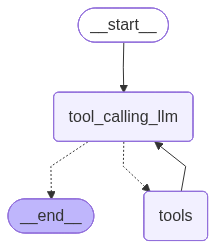

In [14]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

##Node Definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


graph=StateGraph(State)

#Add nodes
graph.add_node("tool_calling_llm",tool_calling_llm)
graph.add_node("tools",ToolNode(tools))
#Add edges
graph.add_edge(START,"tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",
    #if the latest message (result) from assistant is a tool call ->tool condition routes to tool
    # If the latest message (result) from assistant is not a tool call->tool_condition routes to END
        tools_condition
)

graph.add_edge("tools","tool_calling_llm")

graph_compile=graph.compile()

display(Image(graph_compile.get_graph().draw_mermaid_png()))


In [15]:
messages=graph_compile.invoke({"messages":HumanMessage(content="Provide me top 10 recent AI News,add 5 plus 5 and divide by 12?")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Provide me top 10 recent AI News,add 5 plus 5 and divide by 12?
================================== Ai Message ==================================
Tool Calls:
  add (call_Sfj2z3Eq00ryYgT9k7BH7BuH)
 Call ID: call_Sfj2z3Eq00ryYgT9k7BH7BuH
  Args:
    a: 5
    b: 5
  divide (call_w1vyibphhdFBy4iOPVMv8TaI)
 Call ID: call_w1vyibphhdFBy4iOPVMv8TaI
  Args:
    a: 10
    b: 12
================================= Tool Message =================================
Name: add

10
================================= Tool Message =================================
Name: divide

0.8333333333333334
================================== Ai Message ==================================

The result of adding 5 plus 5 is 10, and dividing by 12 gives approximately 0.83.

As for the top 10 recent AI news, here they are:

1. **ChatGPT's Enhanced Features** - OpenAI announced new features for ChatGPT, including multimodal capabilities that allow

In [16]:
messages=graph_compile.invoke({"messages":HumanMessage(content="Add 5 plus 5?")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Add 5 plus 5?
================================== Ai Message ==================================
Tool Calls:
  add (call_gXOdmsRFGuKjuHGebWv5QkcS)
 Call ID: call_gXOdmsRFGuKjuHGebWv5QkcS
  Args:
    a: 5
    b: 5
================================= Tool Message =================================
Name: add

10
================================== Ai Message ==================================

5 plus 5 equals 10.


In [20]:
messages=[HumanMessage(content="Divide that by 5?")]
messages=graph_compile.invoke({"messages":messages})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Divide that by 5?
================================== Ai Message ==================================

Could you please provide the number that you would like to divide by 5?


## Memory Saver

**Memory Saver** is a checkpointing mechanism in LangGraph that persists conversation state across multiple interactions, allowing agents to maintain context between sessions using thread IDs.


In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

##Node Definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


graph=StateGraph(State)

#Add nodes
graph.add_node("tool_calling_llm",tool_calling_llm)
graph.add_node("tools",ToolNode(tools))
#Add edges
graph.add_edge(START,"tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",
    #if the latest message (result) from assistant is a tool call ->tool condition routes to tool
    # If the latest message (result) from assistant is not a tool call->tool_condition routes to END
        tools_condition
)

graph.add_edge("tools","tool_calling_llm")


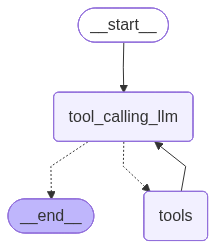

In [22]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
graph_compile=graph.compile(checkpointer=memory)

display(Image(graph_compile.get_graph().draw_mermaid_png()))


In [23]:
##Specify the thread

config={"configurable":{"thread_id":"1"}}
messages=[HumanMessage(content="add 5 plus 5 ")]
messages=graph_compile.invoke({"messages":messages},config=config)

for m in messages["messages"]:
    m.pretty_print()
    
    

================================ Human Message =================================

add 5 plus 5 
================================== Ai Message ==================================
Tool Calls:
  add (call_Fm41WsQzMQzwm6yjPtLtRnjZ)
 Call ID: call_Fm41WsQzMQzwm6yjPtLtRnjZ
  Args:
    a: 5
    b: 5
================================= Tool Message =================================
Name: add

10
================================== Ai Message ==================================

5 plus 5 equals 10.


In [24]:
messages=[HumanMessage(content="Add that number to 25 ")]
messages=graph_compile.invoke({"messages":messages},config=config)

for m in messages["messages"]:
    m.pretty_print()
    
    

================================ Human Message =================================

add 5 plus 5 
================================== Ai Message ==================================
Tool Calls:
  add (call_Fm41WsQzMQzwm6yjPtLtRnjZ)
 Call ID: call_Fm41WsQzMQzwm6yjPtLtRnjZ
  Args:
    a: 5
    b: 5
================================= Tool Message =================================
Name: add

10
================================== Ai Message ==================================

5 plus 5 equals 10.
================================ Human Message =================================

Add that number to 25 
================================== Ai Message ==================================
Tool Calls:
  add (call_cSvI7EsqEkqTwnfDPWivII44)
 Call ID: call_cSvI7EsqEkqTwnfDPWivII44
  Args:
    a: 10
    b: 25
================================= Tool Message =================================
Name: add

35
================================== Ai Message ==================================

10 added to 25 equals 35.


In [25]:
messages=[HumanMessage(content="multiply that number by 3 ")]
messages=graph_compile.invoke({"messages":messages},config=config)

for m in messages["messages"]:
    m.pretty_print()
    
    

================================ Human Message =================================

add 5 plus 5 
================================== Ai Message ==================================
Tool Calls:
  add (call_Fm41WsQzMQzwm6yjPtLtRnjZ)
 Call ID: call_Fm41WsQzMQzwm6yjPtLtRnjZ
  Args:
    a: 5
    b: 5
================================= Tool Message =================================
Name: add

10
================================== Ai Message ==================================

5 plus 5 equals 10.
================================ Human Message =================================

Add that number to 25 
================================== Ai Message ==================================
Tool Calls:
  add (call_cSvI7EsqEkqTwnfDPWivII44)
 Call ID: call_cSvI7EsqEkqTwnfDPWivII44
  Args:
    a: 10
    b: 25
================================= Tool Message =================================
Name: add

35
================================== Ai Message ==================================

10 added to 25 equals 35.
===